In [3]:
import altair as alt

In [4]:
import pandas as pd

In [5]:
my_data = pd.read_csv('combinded_suspicious.csv')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [8]:
my_data.head()
my_data['month_day_yr'] = pd.to_datetime(my_data['month_day_yr'])

In [10]:
my_data.head()

,Source,Etype,Destination,TimeStamp,Source_Names,Destination_Names,full_date,month_day_yr,month_yr,month,yr
0,857138,calls,1108217,1446616923,Richard Fox,Lindsy Henion,2015-11-04 06:02:03,2015-11-04,11/2015,11,2015
1,857138,calls,1690582,1446625263,Richard Fox,Meryl Pastuch,2015-11-04 08:21:03,2015-11-04,11/2015,11,2015
2,1039322,calls,387200,1446742253,Dylan Ballard,Augusta Sharp,2015-11-05 16:50:53,2015-11-05,11/2015,11,2015
3,28520,calls,1886447,1446752753,Refugio Orrantia,Julie Tierno,2015-11-05 19:45:53,2015-11-05,11/2015,11,2015
4,728286,calls,696047,1446798233,Kerstin Belveal,Jose Ringwald,2015-11-06 08:23:53,2015-11-06,11/2015,11,2015



0 is for calls
1 is for emails
2 is for purchases
3 is for meetings


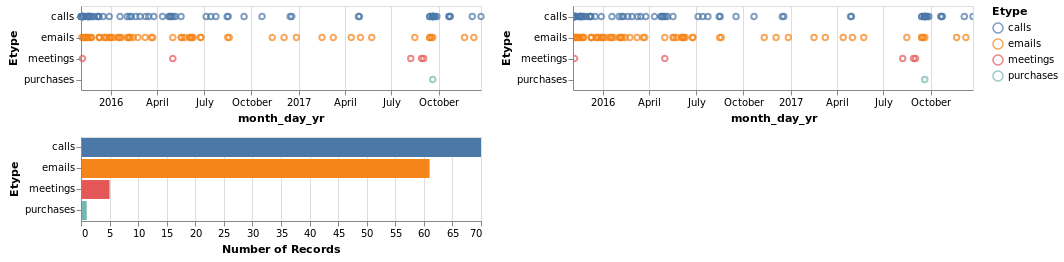

In [9]:
interval = alt.selection_interval(encodings=['x'])
chart1 = alt.Chart(my_data).mark_point().encode(
    x='month_day_yr:T',
    y='Etype:N',
    color=alt.condition(interval,'Etype:N',alt.value('lightgray')),
    tooltip=['Source_Names','Destination_Names']
).interactive().properties(selection=interval)

chart2 = alt.Chart(my_data).mark_point().encode(
    x='month_day_yr:T',
    y='Etype:N',
    color=alt.condition(interval,'Etype:N',alt.value('lightgray')),
    tooltip=['Source_Names','Destination_Names']
).interactive().transform_filter(interval)


hist = alt.Chart(my_data).mark_bar().encode(
    y='Etype:N',
    x='count()',
    color='Etype:N'
).transform_filter(
    interval
)


(chart1 | chart2) & hist

In [6]:
alt.data_transformers.enable('default')
((chart1 | chart2)).save('vast_data_no_bar_chart.html')

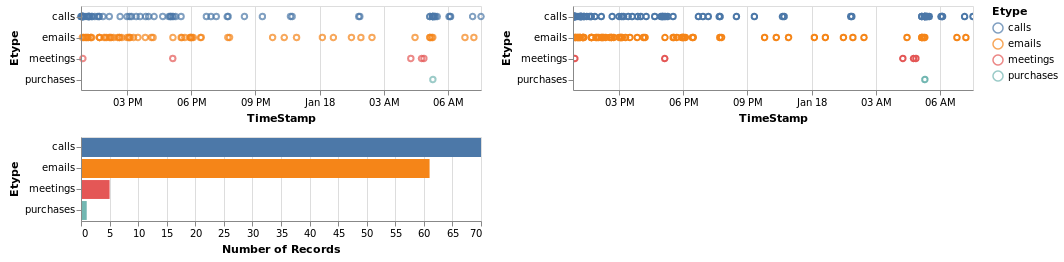

In [7]:
interval = alt.selection_interval(encodings=['x'])
chart1 = alt.Chart(my_data).mark_point().encode(
    x='TimeStamp:T',
    y='Etype:N',
    color=alt.condition(interval,'Etype:N',alt.value('lightgray')),
    tooltip=['Source_Names','Destination_Names']
).interactive().properties(selection=interval)

chart2 = alt.Chart(my_data).mark_point().encode(
    x='TimeStamp:T',
    y='Etype:N',
    color=alt.condition(interval,'Etype:N',alt.value('lightgray')),
    tooltip=['Source_Names','Destination_Names', 'count()']
).interactive().transform_filter(interval)


hist = alt.Chart(my_data).mark_bar().encode(
    y='Etype:N',
    x='count()',
    color='Etype:N'
).transform_filter(
    interval
)


(chart1 | chart2) & hist

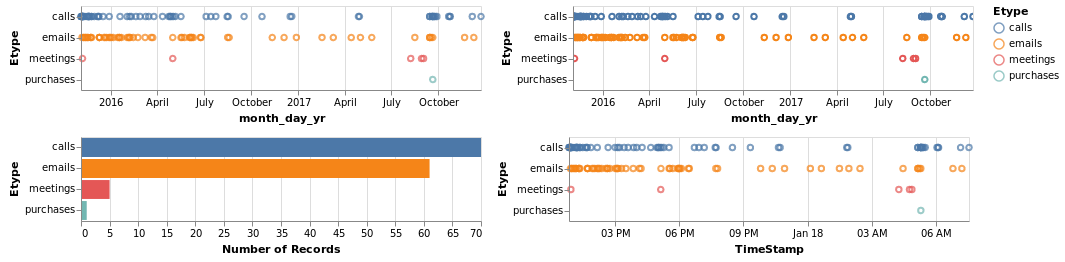

In [14]:
(chart1.encode(x='month_day_yr:T') | chart2.encode(x='month_day_yr:T')) & (hist | chart1.encode(x='TimeStamp:T'))

In [9]:
((chart1 | chart2) & hist).save('vast_data_withbarchart.html')

In [10]:
((chart1 | chart2) & (hist | chart1.encode(x='TimeStamp:T'))).save('vast_data_quad_chart_interactive.html')

In [11]:
purchase_data = pd.read_csv('purchase_detail.csv')

In [12]:
purchase_data.head()

,Unnamed: 0,Destination,Purchase_Count,Destination_Names
0,458,2037791,1,Brett Higgins
1,146,2037741,1,Justin Harvey
2,147,2037815,1,Winnie Klein
3,324,2037873,1,Danielle Yu
4,323,2037947,1,Belle Houston


In [113]:
interval = alt.selection_interval(encodings=['x','y'])

In [161]:
scatter = alt.Chart(purchase_data).mark_point().encode(
    y='Purchase_Count',
    x='Purchase_Count',
    color=alt.condition(interval,alt.value('green'), alt.value('blue'))
).interactive().properties(selection=interval)

In [162]:

histogram= alt.Chart(purchase_data).mark_bar().encode(
    y='count()',
    x=alt.X('Purchase_Count',bin=True)
).interactive().transform_filter(
    interval
)

In [171]:
scatter2 = alt.Chart(purchase_data).mark_point().encode(
    y='Destination',
    x='Purchase_Count',
    tooltip='Destination_Names'
).interactive().transform_filter(
    interval
)


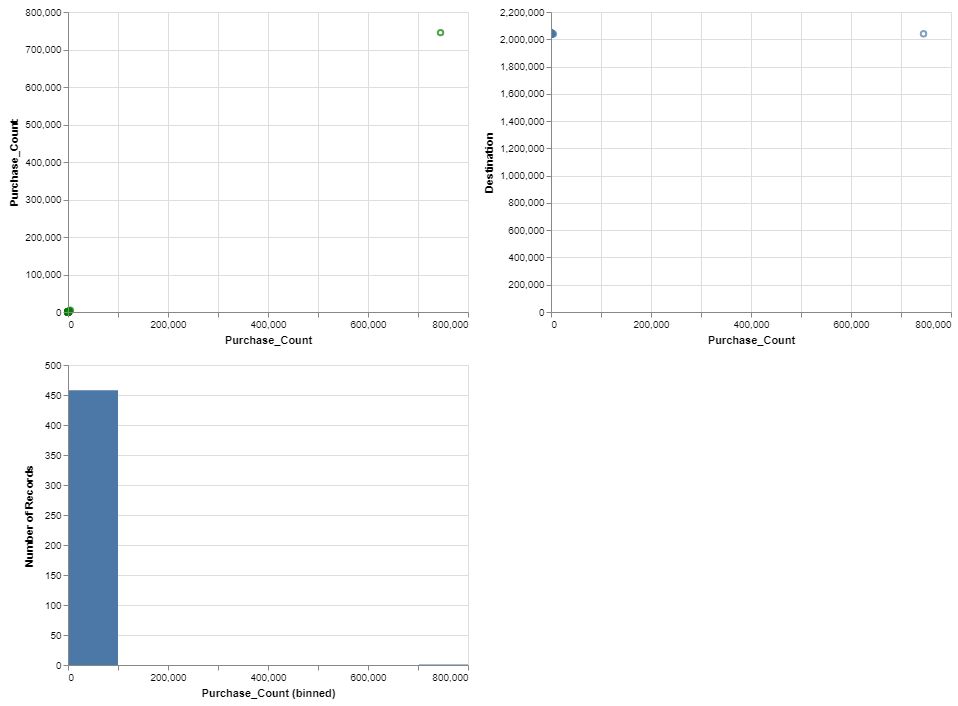

In [172]:
(scatter | scatter2) & histogram

In [142]:
((scatter | scatter2) & histogram).save('purchase_data_with_gail.html')

In [143]:
purchase_data.tail()

,Unnamed: 0,Destination,Purchase_Count,Destination_Names
454,2,2037744,1902,Miesha Lettsome
455,1,2040624,2385,Torri Devilliers
456,3,2038155,2590,Brandon Bradley
457,5,2040339,4798,Fairy Boratko
458,0,2040565,745027,Gail Feindt


In [144]:
no_gail =purchase_data.drop(458)

In [145]:
no_gail.tail()

,Unnamed: 0,Destination,Purchase_Count,Destination_Names
453,6,2037694,990,Ernest Patterson
454,2,2037744,1902,Miesha Lettsome
455,1,2040624,2385,Torri Devilliers
456,3,2038155,2590,Brandon Bradley
457,5,2040339,4798,Fairy Boratko


In [150]:
interval = alt.selection_interval()
scatter = alt.Chart(no_gail).mark_point().encode(
    y='Purchase_Count',
    x='Purchase_Count',
    color=alt.condition(interval,alt.value('green'), alt.value('blue'))
).interactive().properties(selection=interval)

In [151]:

histogram= alt.Chart(no_gail).mark_bar().encode(
    y='count()',
    x=alt.X('Purchase_Count',bin=True)
).interactive().transform_filter(
    interval
)

In [167]:
scatter2 = alt.Chart(no_gail).mark_point().encode(
    y='Purchase_Count',
    x='Purchase_Count',
    tooltip='Destination_Names'
).interactive().transform_filter(
    interval
)

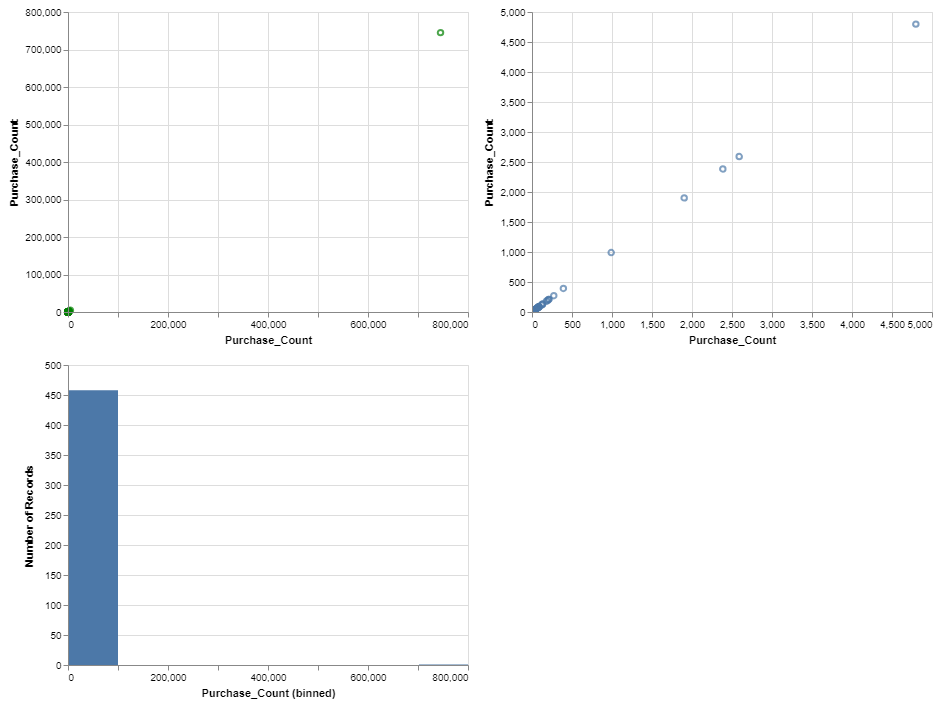

In [168]:
(scatter | scatter2) & histogram

In [21]:
data_freq = pd.read_csv('data_described_frequency.csv')

In [22]:
data_freq.head()
data_freq.columns

Index(['Unnamed: 0', 'month_yr_freq_calls', 'month_yr_freq_emails',
       'month_yr_freq_purchases', 'month_yr_freq_meetings'],
      dtype='object')

In [23]:
data_freq.rename(columns={'Unnamed: 0':'month_yr'}, inplace=True)

In [25]:
data_freq.columns

Index(['month_yr', 'month_yr_freq_calls', 'month_yr_freq_emails',
       'month_yr_freq_purchases', 'month_yr_freq_meetings'],
      dtype='object')

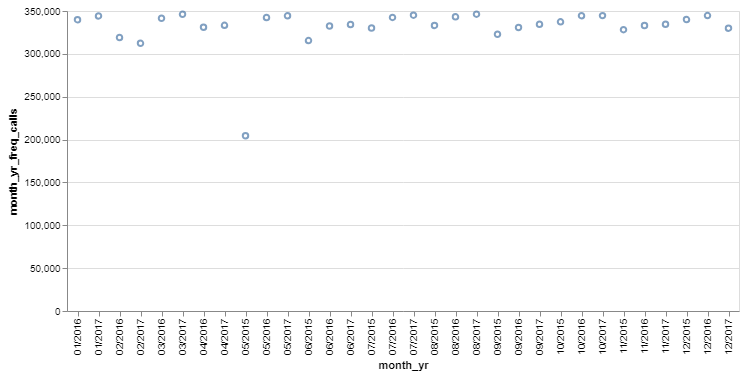

In [34]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_calls',
    x='month_yr',
)

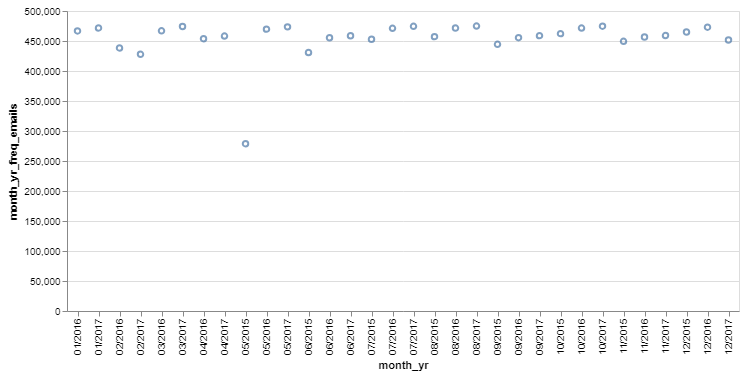

In [35]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_emails',
    x='month_yr',
)

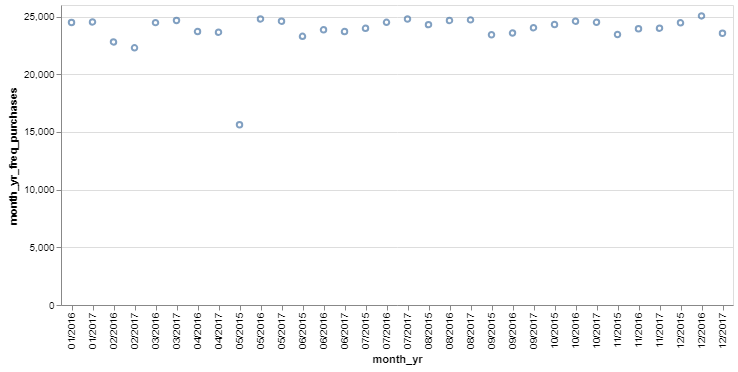

In [36]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_purchases',
    x='month_yr',
)

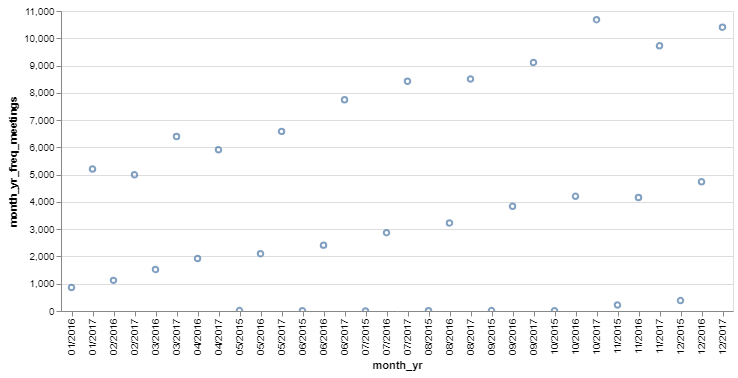

In [40]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_meetings',
    x='month_yr',
    tooltip=['month_yr_freq_meetings']
).interactive()

In [11]:
import pandas as pd
import altair as alt
interval = alt.selection_interval()
data_freq2 = pd.read_csv('data_described_frequency_v2.csv')

In [12]:
data_freq2.head()

,Unnamed: 0,avg_time_between_interactions,change_in_unique_dest,change_in_unique_source,data_amount,data_type,month_yr,num_unique_dest,num_unique_source,date_time
0,40,6.440824,29,41,278795,emails,05/2015,10491,10769,2015-05-01
1,72,114.981942,25,2448,15617,purchases,05/2015,63,4834,2015-05-01
2,104,104736.000000,5,13,15,meetings,05/2015,5,14,2015-05-01
3,8,8.785978,133,152,204382,calls,05/2015,10658,10728,2015-05-01
4,75,111.327434,34,7138,23282,purchases,06/2015,72,10772,2015-06-01


data_frequency month_yr data_type

In [16]:
chart = alt.Chart(data_freq2).mark_point().encode(
    y='data_amount',
    x='month_yr',
    color='data_type',
    tooltip=['data_type', 'data_amount']
).interactive()



In [17]:
combined_chart = (chart.properties(selection=interval) | chart.transform_filter(interval))

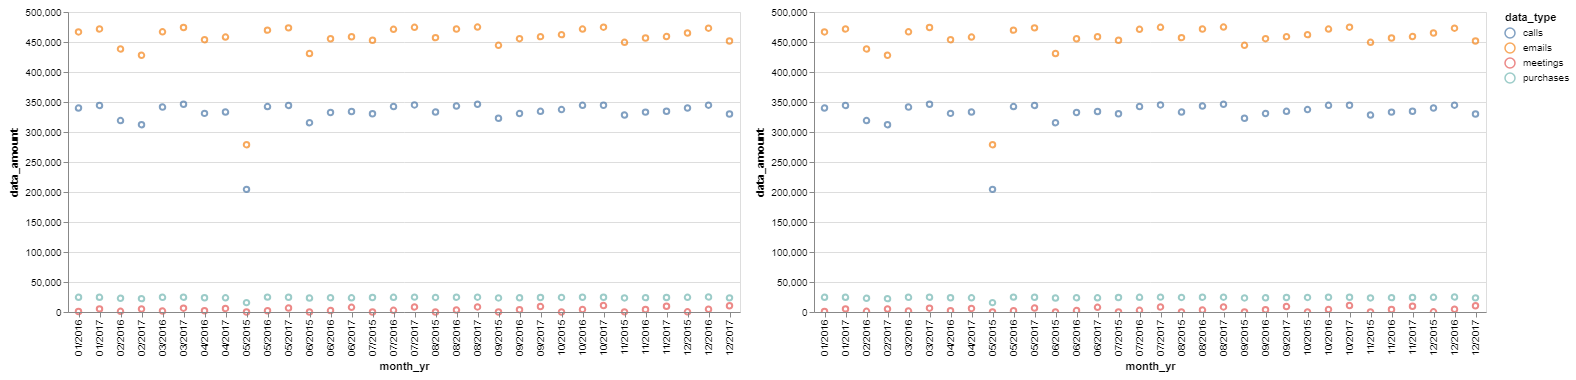

In [18]:
combined_chart

In [19]:
combined_chart.save('frequency_data.html')

In [20]:
histogram= alt.Chart(data_freq2).mark_bar().encode(
    y='data_amount',
    x='month_yr',
    color='data_type',
    column='data_type'
).interactive()

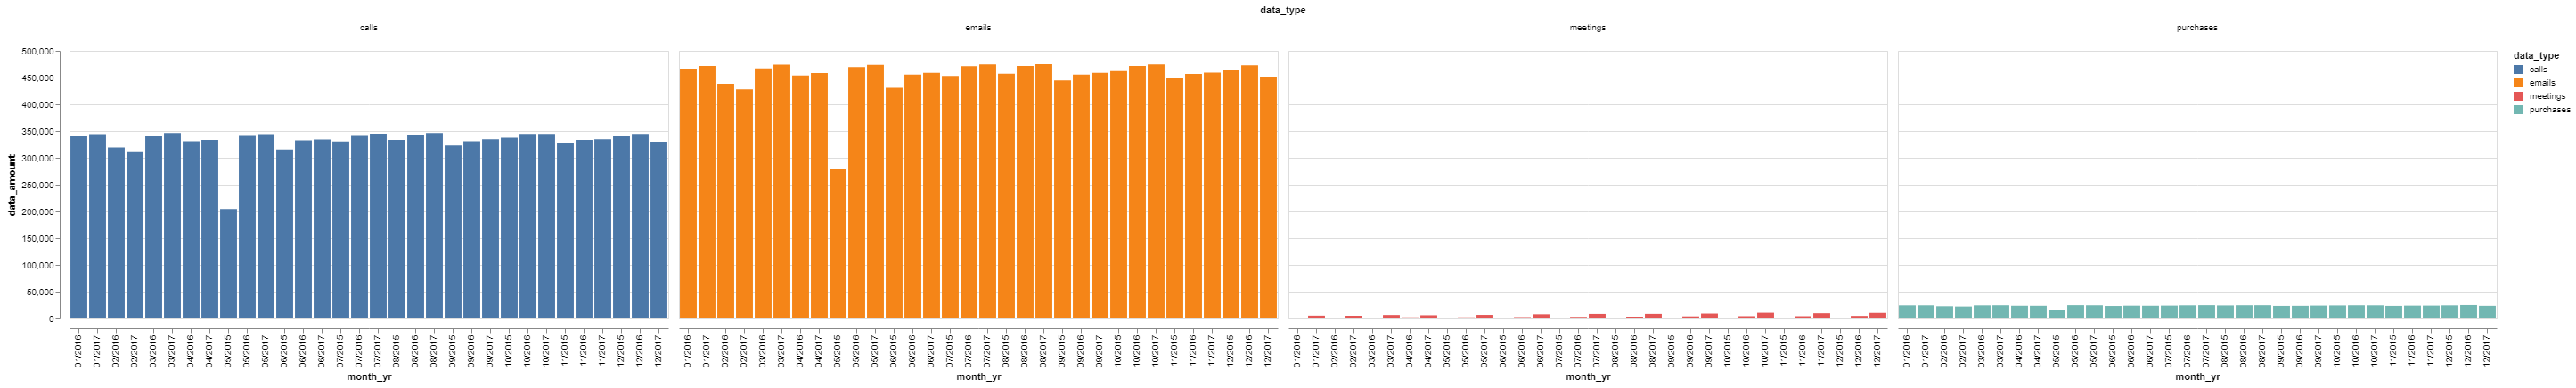

In [21]:
histogram

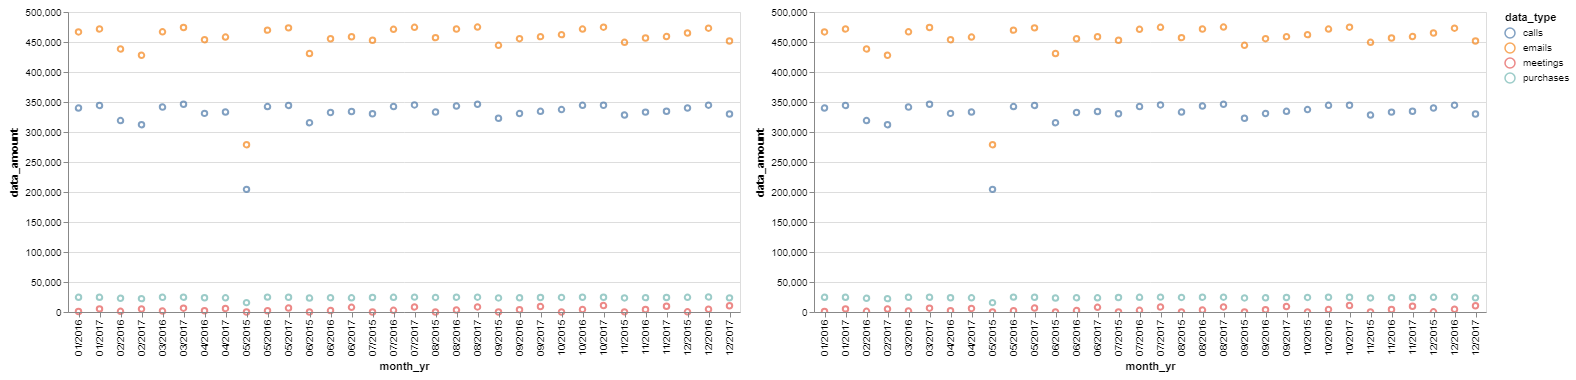

In [22]:
(chart.properties(selection=interval) | chart.transform_filter(interval))

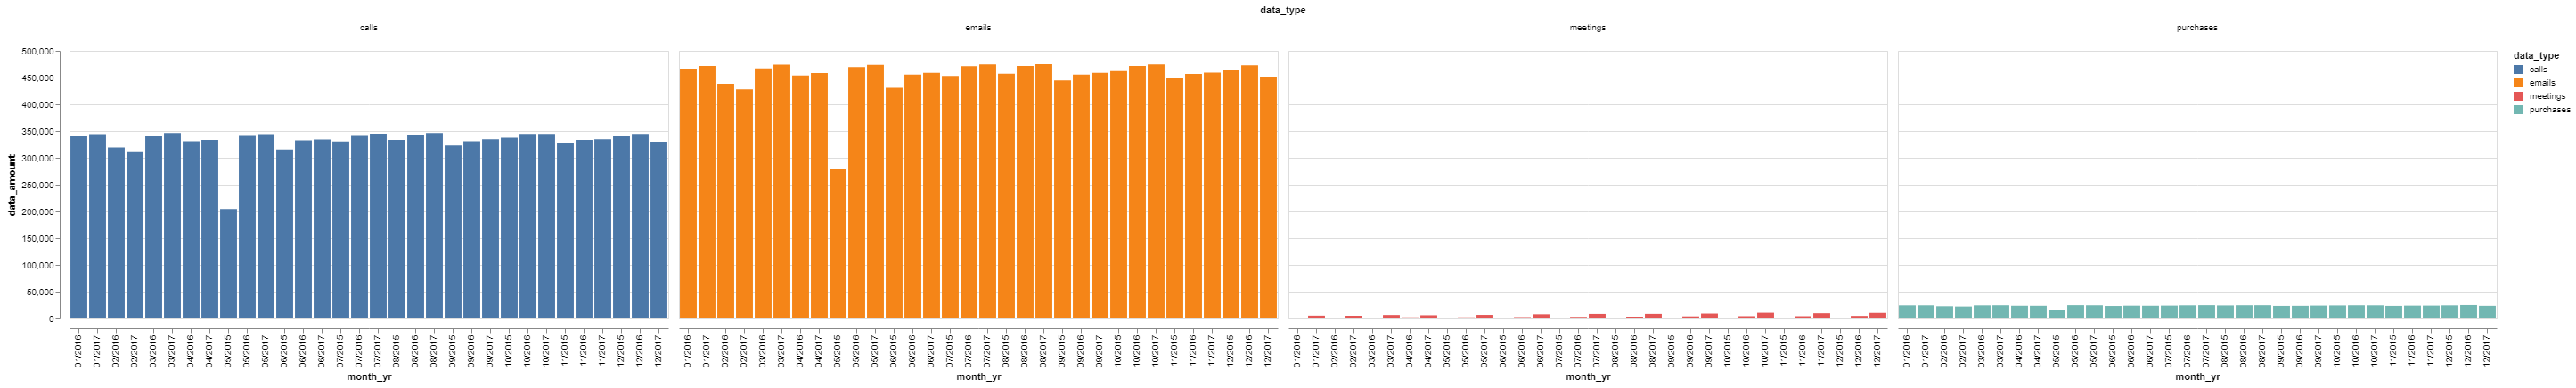

In [23]:
histogram

In [24]:
interval = alt.selection_interval()

In [25]:
hist2 = alt.Chart(data_freq2).mark_bar().encode(
    y='data_amount',
    x='month_yr',
    color='data_type'
).interactive()

In [26]:
interactive_frequnecy_charts = (chart.properties(selection=interval) | chart.transform_filter(interval)) & hist2.transform_filter(interval)

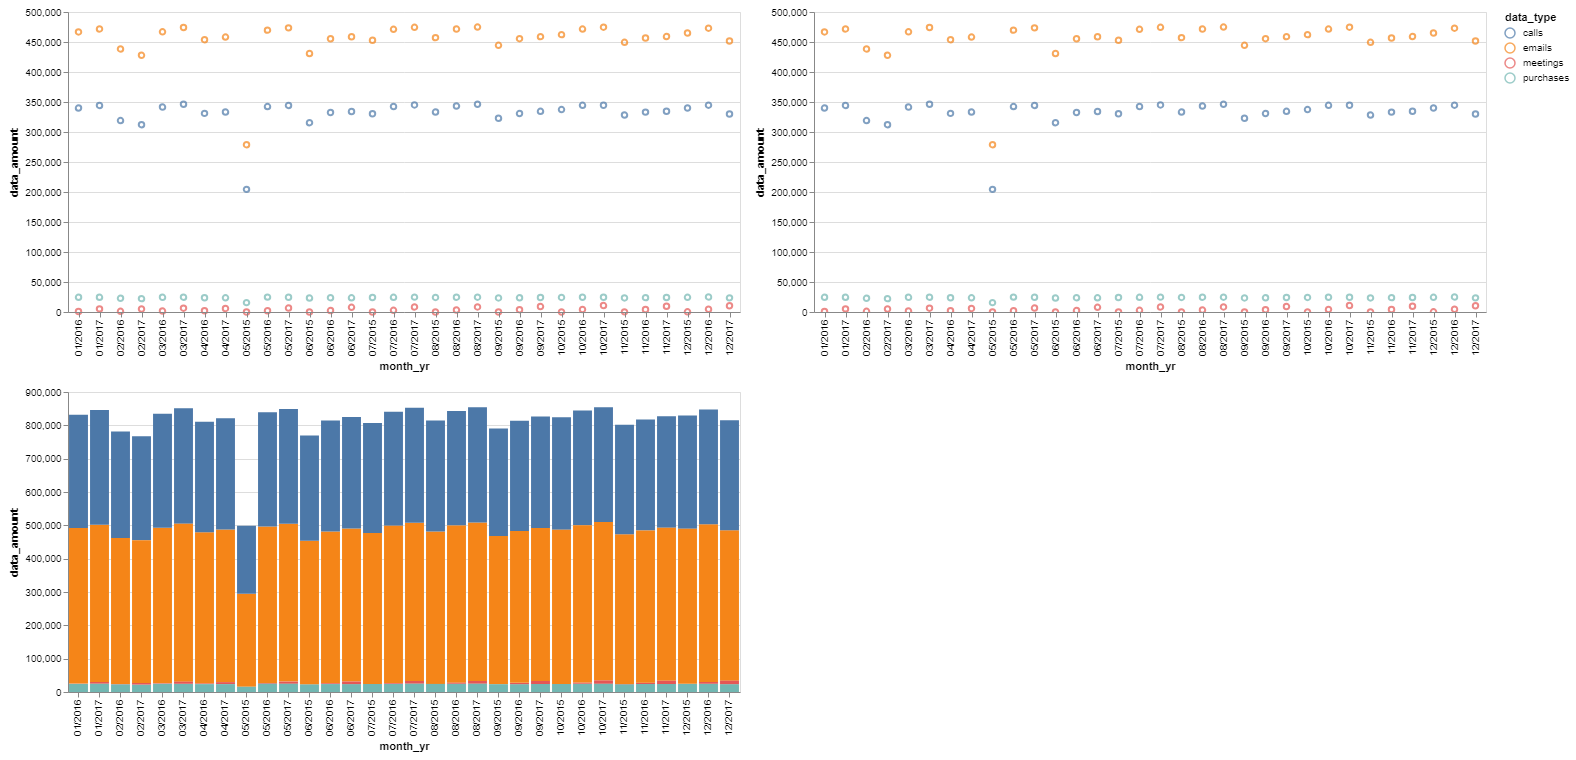

In [27]:
interactive_frequnecy_charts

In [82]:
interactive_frequnecy_charts.save('interactive_frequency_charts.html')

Looking at the uniques over the time, unique sources, unique destinations, and unique pairs
Comparing the actual unique users from month to month
Overal unique set

Take consideration to if the direction matters or if it is just the frequency

What if we take a look at purchases without considering gale? Time between purchases?  Is there a spike of other purchases against gale

New unique IDs could be important as it might do a good job of describing growth over time

Supplemnt the graph of the suspicious people with the count of the data that appears for each person

Charactize the inital group so that we can pull out what other supicious
    -Do the suspicious/destinations for official suspicious and suspected suspicious do multiple purchases?
    -How many purchases did they make over time?
    -Interactions preceeding the suspicous?
    -Is our suspicious purchaser source/destination talking to other people during the same time?  Lots of people? Meetings?
    -Have you ever communicated with a person prior to a purchase?  Is it common to continue to talk to a person post purchase?
    -Did rose and janice talk prior to the 2 week period of the purchasE?
    
    